# Problem Statement

COVID-19 telah menjadi permasalahan global beberapa tahun terakhir di seluruh negara karena berdampak pada sektor-sektor yang penting dalam kehidupan. Beberapa kebijakan telah dikeluarkan oleh pemerintah setempat untuk mencegah COVID-19 dan hingga hari ini kebijakan tersebut dikeluarkan sesuai dengan keadaan tren COVID-19 di suatu wilayah, sampai pada suatu titik dimana beberapa wilayah telah menjadikan COVID-19 sebagai endemi. Menurut Pusat Pengendalian dan Pencegahan Penyakit Amerika (CDC), endemi mengacu pada kehadiran suatu wabah penyakit terus menerus pada populasi di bentang geografis tertentu, seperti satu wilayah, negara, atau benua.

Kebijakan tiap wilayah yang berbeda dalam menyikapi COVID-19 menjadikan diri sendiri dan orang sekitar sebagai pelaku utama dalam penanganan COVID-19 harus mampu mengendalikan diri. Penanganan COVID-19 tidak akan jauh dari pengendalian mobilitas masyarakat di suatu wilayah, seberapa baik kebijakan yang dikeluarkan pemerintah untuk mengendalikan mobilitas, tentunya menjadikan diri pribadi sebagai aktor yang paling berperan. sehingga dibutuhkan sarana dalam pengambilan keputusan masyarakat dalam kegiatan di luar ruangan dan berpergian ke suatu wilayah.

Berdasarkan masalah di atas, tim kami berusaha membuat model prediksi risk assessment level di suatu wilayah menggunakan data COVID-19 Global. sehingga, pengguna hanya perlu mengetahui perkembangan terakhir COVID-19 di wilayah yang dituju dan mendapatkan kategori wilayah yang di tuju.

# Clustering

Pada clustering, data akan dibuat clustering target data berupa risk assesment level COVID-19 yang akan menjadi rekomendasi untuk perjalanan luar negeri. Hal ini di dasarkan dari Risk Assessment Level COVID-19 yang dilakukan oleh Centers for Disease Control and Prevention (CDC).

Hasil clustering nantinya akan diolah kembali untuk menghasilkan prediksi resiko penularan covid-19 pada tujuan perjalanan.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.style.use('seaborn')

### Data Loading

Dataset yang digunakan dalam tugas kali ini bersumber dari (https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

Berdasarkan data ini akan dilakukan clustering dari angka confirmed, deaths, recorvered. Untuk menjadi rekomendasi perjalanan

In [13]:
df = pd.read_csv('covid_19_data.csv')

## EDA

In [14]:
df.shape

(306429, 8)

In [15]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [16]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

### Data Cleaning

In [17]:
data = df.drop(["SNo","ObservationDate","Last Update","Province/State","Country/Region"], axis=1)
data

,Confirmed,Deaths,Recovered
0,1.0,0.0,0.0
1,14.0,0.0,0.0
2,6.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
306424,102641.0,2335.0,95289.0
306425,29147.0,245.0,0.0
306426,1364.0,1.0,1324.0
306427,87550.0,1738.0,83790.0


In [18]:
array_data = np.array(data)
array_data

array([[1.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.40000e+01, 0.00000e+00, 0.00000e+00],
       [6.00000e+00, 0.00000e+00, 0.00000e+00],
       ...,
       [1.36400e+03, 1.00000e+00, 1.32400e+03],
       [8.75500e+04, 1.73800e+03, 8.37900e+04],
       [3.91559e+05, 4.25200e+03, 0.00000e+00]])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Confirmed  306429 non-null  float64
 1   Deaths     306429 non-null  float64
 2   Recovered  306429 non-null  float64
dtypes: float64(3)
memory usage: 7.0 MB


### Data Preprocessing

#### Standarization

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler_minmax = MinMaxScaler()
scaled_data = scaler_minmax.fit_transform(data)
scaled_data

array([[0.04911545, 0.00158134, 0.11778502],
       [0.04911756, 0.00158134, 0.11778502],
       [0.04911626, 0.00158134, 0.11778502],
       ...,
       [0.0493365 , 0.00159022, 0.11796754],
       [0.06331416, 0.01702158, 0.12933599],
       [0.1126184 , 0.03935574, 0.11778502]])

In [22]:
data_scaled = pd.DataFrame(scaled_data, columns=[['Confirmed','Death','Recovered']])
data_scaled

,Confirmed,Death,Recovered
0,0.049115,0.001581,0.117785
1,0.049118,0.001581,0.117785
2,0.049116,0.001581,0.117785
3,0.049115,0.001581,0.117785
4,0.049115,0.001581,0.117785
...,...,...,...
306424,0.065762,0.022325,0.130921
306425,0.053842,0.003758,0.117785
306426,0.049337,0.001590,0.117968
306427,0.063314,0.017022,0.129336


### Data Modelling

In [23]:
from sklearn.cluster import KMeans

In [24]:
k_means = KMeans(n_clusters=5, init='random', max_iter=300, random_state=20)
km = k_means.fit_predict(scaled_data)

In [25]:
df['Risk Assesment Level'] = km
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Risk Assesment Level
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,3
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,3
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,3
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,3
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0,3
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0,3
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0,3
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0,3


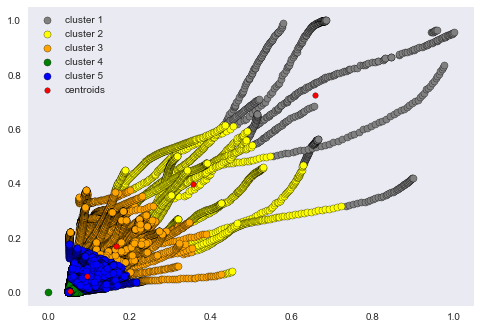

In [26]:
# plot the 5 clusters
plt.scatter(
    scaled_data[km == 0, 0], scaled_data[km == 0, 1],
    s=50, c='grey', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    scaled_data[km  == 1, 0], scaled_data[km  == 1, 1],
    s=50, c='yellow', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    scaled_data[km  == 2, 0], scaled_data[km  == 2, 1],
    s=50, c='orange', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    scaled_data[km == 3, 0], scaled_data[km  == 3, 1],
    s=50, c='green', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    scaled_data[km  == 4, 0], scaled_data[km  == 4, 1],
    s=50, c='blue', edgecolor='black',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1],
    s=30, c='red', edgecolor='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

In [27]:
kondisi = [
    (df['Risk Assesment Level']==0),
    (df['Risk Assesment Level']==1),
    (df['Risk Assesment Level']==2),
    (df['Risk Assesment Level']==3),
    (df['Risk Assesment Level']==4)]
pilihan = ['Special Circumstances','High','Moderate','Low','Unknown',]
df['Risk Assesment Level'] = np.select(kondisi, pilihan)
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Risk Assesment Level
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,Low
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,Low
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,Low
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,Low
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,Low
...,...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0,Low
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0,Low
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0,Low
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0,Low


In [28]:
df['Risk Assesment Level'].value_counts()

Low                      266313
Unknown                   29517
Moderate                   7994
High                       1956
Special Circumstances       649
Name: Risk Assesment Level, dtype: int64

## Klasifikasi Data

Klasifikasi data dilakukan untuk menghasilkan prediksi dari data hasil clustering menggunakan k-means. Pada klasifikasi data digunakan model SVM 

#### EDA

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SNo                   306429 non-null  int64  
 1   ObservationDate       306429 non-null  object 
 2   Province/State        228329 non-null  object 
 3   Country/Region        306429 non-null  object 
 4   Last Update           306429 non-null  object 
 5   Confirmed             306429 non-null  float64
 6   Deaths                306429 non-null  float64
 7   Recovered             306429 non-null  float64
 8   Risk Assesment Level  306429 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 21.0+ MB


In [30]:
df.shape

(306429, 9)

In [31]:
###Missing Value
df.isnull().sum()

SNo                         0
ObservationDate             0
Province/State          78100
Country/Region              0
Last Update                 0
Confirmed                   0
Deaths                      0
Recovered                   0
Risk Assesment Level        0
dtype: int64

## Data Cleaning dan Preprocessing

In [32]:
#drop kolom
df_klas = df.drop(["SNo","ObservationDate","Last Update","Province/State","Country/Region"], axis=1)

In [33]:
df_klas

,Confirmed,Deaths,Recovered,Risk Assesment Level
0,1.0,0.0,0.0,Low
1,14.0,0.0,0.0,Low
2,6.0,0.0,0.0,Low
3,1.0,0.0,0.0,Low
4,0.0,0.0,0.0,Low
...,...,...,...,...
306424,102641.0,2335.0,95289.0,Low
306425,29147.0,245.0,0.0,Low
306426,1364.0,1.0,1324.0,Low
306427,87550.0,1738.0,83790.0,Low


In [35]:
df_klas.corr()['Risk Assesment Level'].sort_values(ascending=False)

Risk Assesment Level    1.000000
Recovered              -0.200250
Confirmed              -0.393099
Deaths                 -0.410040
Name: Risk Assesment Level, dtype: float64

In [36]:
#mengecek outlier 
from scipy import stats
df_tescor = df_klas

In [37]:
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df_tescor[df_tescor.columns]))
threshold(z,df_tescor[df_tescor.columns])

With threshold 3.0 data loss is 2.71%
With threshold 3.2 data loss is 2.53%
With threshold 3.4 data loss is 2.35%
With threshold 3.6 data loss is 2.17%
With threshold 3.8 data loss is 1.99%
With threshold 4.0 data loss is 1.83%
With threshold 4.2 data loss is 1.67%
With threshold 4.4 data loss is 1.52%
With threshold 4.6 data loss is 1.41%
With threshold 4.8 data loss is 1.31%


In [39]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_tescor)}')

filtered_entries = np.array([True] * len(df_tescor))
for col in df_tescor:
    zscore = abs(stats.zscore(df_tescor[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_outlierZ = df_tescor[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_outlierZ)}')

Jumlah baris sebelum memfilter outlier: 306429
Jumlah baris setelah memfilter outlier: 298132


In [40]:
df_klasifikasi = df_outlierZ
df_klasifikasi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298132 entries, 0 to 306428
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Confirmed             298132 non-null  float64
 1   Deaths                298132 non-null  float64
 2   Recovered             298132 non-null  float64
 3   Risk Assesment Level  298132 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 10.2 MB


In [41]:
df_klasifikasi.corr()['Risk Assesment Level'].sort_values(ascending=False)

Risk Assesment Level    1.000000
Confirmed               0.459116
Deaths                  0.442180
Recovered               0.429941
Name: Risk Assesment Level, dtype: float64

#### Preprocessing

In [42]:
df_dummy = pd.get_dummies(df_klasifikasi)

In [43]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298132 entries, 0 to 306428
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Confirmed             298132 non-null  float64
 1   Deaths                298132 non-null  float64
 2   Recovered             298132 non-null  float64
 3   Risk Assesment Level  298132 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 10.2 MB


In [44]:
X = df_dummy.drop(['Risk Assesment Level'],axis = 1)
y = df_dummy['Risk Assesment Level']

In [45]:
#standarisasi
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

In [46]:
X_scaler = pd.DataFrame(X_scaler,columns = X.columns)

In [47]:
# baseline
y.value_counts(normalize=True)*100

3    89.297023
4     9.643044
2     1.059933
Name: Risk Assesment Level, dtype: float64

In [48]:
#split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size = 0.3,stratify = y,random_state = 58)

In [49]:
y_train.value_counts()

3    186356
4     20124
2      2212
Name: Risk Assesment Level, dtype: int64

karena data y_train tidak seimbang maka harus diseimbangkan terlebih dahulu dengan menggunakan Undersampling sehingga data akan disesuaikan dengan data latih terkecil

In [50]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler()
X_under, y_under = undersampling.fit_resample(X_train,y_train)

In [51]:
y_under.value_counts()

2    2212
3    2212
4    2212
Name: Risk Assesment Level, dtype: int64

In [52]:
# new baseline
y_under.value_counts(normalize=True)*100

2    33.333333
3    33.333333
4    33.333333
Name: Risk Assesment Level, dtype: float64

## Modelling

In [53]:
def evaluasi(model,X_test,y_test):
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)
    return accuracy_score(y_test,y_pred)*100

In [54]:
def evaluasi_auc(model,X_test,y_test):
    from sklearn.metrics import roc_auc_score
    y_pred = model.predict_proba(X_test)
    return roc_auc_score(y_test,y_pred)*100

#### Support Vector Machine

In [55]:
from sklearn import svm
from sklearn.svm import SVC

In [56]:
svm_model = SVC(kernel='rbf', C=1, gamma='auto')

In [57]:
svm_model.fit(X_under,y_under)

SVC(C=1, gamma='auto')

In [58]:
evaluasi(svm_model,X_test,y_test)

96.84816636851521

In [59]:
#mencari parameter terbaik
from sklearn.model_selection import GridSearchCV
params ={'C':[0.01,0.1,1,2,3,5]}

grid = GridSearchCV(
             estimator=svm_model, # model yang akan digunakan
             param_grid=params, # hyperparameter yang dipilih
             scoring = 'accuracy', # metrics evaluation
             cv = 3 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )
grid.fit(X_under,y_under)

GridSearchCV(cv=3, estimator=SVC(C=1, gamma='auto'),
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 5]}, scoring='accuracy')

In [60]:
grid.best_params_

{'C': 5}

In [61]:
grid.best_score_

0.9853827606992164

In [62]:
print('accuracy : {0:.5f}%'.format(grid.best_score_*100))

accuracy : 98.53828%


#### Pengujian Data Baru

In [63]:
confirm = int(input("Masukkan Angka Terkonfirmasi COVID-19 Wilayah : "))
death = int(input("Masukkan Angka Kematian akibat COVID-19 Wilayah : "))
recovered = int(input("Masukkan Angka Sembuh COVID-19 Wilayah : "))

Masukkan Angka Terkonfirmasi COVID-19 Wilayah : 58
Masukkan Angka Kematian akibat COVID-19 Wilayah : 9
Masukkan Angka Terkonfirmasi COVID-19 Wilayah : 335


In [64]:
data_test=[[confirm,death,recovered]]

In [65]:
pengujian = svm_model.predict(data_test)
if

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([2])

# Conclusion

# Daftar Pustaka

Berikut beberapa referensi yang digunakan:
1. Indraputra, R.A., R.Fitriana, 2020, K-Means Clustering Data COVID-19, Jurnal Teknik Industri, 10(3), pp 275-282.
2. Center for Disease Control and Protection, "Travel Recommendations by Destination" https://www.cdc.gov/coronavirus/2019-ncov/travelers/map-and-travel-notices.html
3. https://blog.rosihanari.net/tutorial-k-means-clustering-dengan-python/
4. Breast Cancer Classifier